In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train_orginal= train.copy()
test_orginal= test.copy()

In [4]:
print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [5]:
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [6]:
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [7]:
print(train.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [8]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
#combining train and test 

In [11]:
train['source']= 'train'
test['Item_Outlet_Sales']= 0

In [12]:
data=pd.concat([train,test], sort=False)

In [13]:
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [14]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

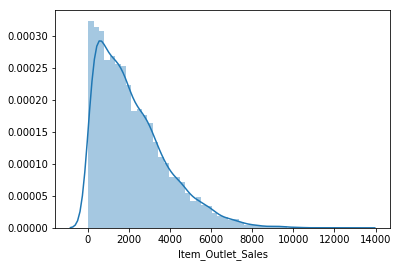

In [15]:
sns.distplot(train['Item_Outlet_Sales'])

In [16]:
print('skewness %f' %data['Item_Outlet_Sales'].skew())

skewness 1.544684


In [17]:
print('Kurtosis %f' %data['Item_Outlet_Sales'].kurt())

Kurtosis 2.419439


In [18]:
#Univariate analysis
#Numerical data

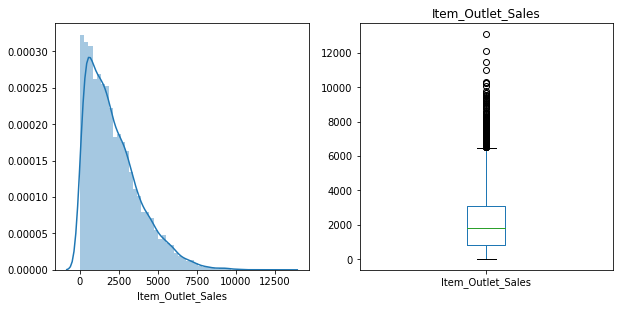

In [19]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Item_Outlet_Sales'])
plt.subplot(222)
train['Item_Outlet_Sales'].plot.box(figsize=(10,10), title="Item_Outlet_Sales")
plt.show()

#Lot of outliers and rightly skewed

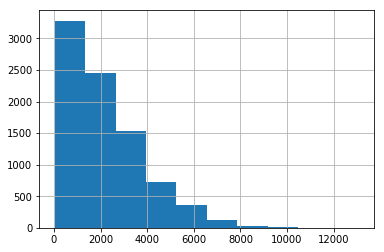

In [20]:
train['Item_Outlet_Sales'].hist();

In [21]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [22]:
df= train.fillna(train['Item_Weight'].mean())
df['Item_Weight']

0        9.300000
1        5.920000
2       17.500000
3       19.200000
4        8.930000
5       10.395000
6       13.650000
7       12.857645
8       16.200000
9       19.200000
10      11.800000
11      18.500000
12      15.100000
13      17.600000
14      16.350000
15       9.000000
16      11.800000
17       9.000000
18      12.857645
19      13.350000
20      18.850000
21      12.857645
22      14.600000
23      12.857645
24      13.850000
25      13.000000
26       7.645000
27      11.650000
28       5.925000
29      12.857645
          ...    
8493     7.420000
8494    15.200000
8495     9.695000
8496     7.420000
8497    13.650000
8498    15.350000
8499    11.600000
8500    20.350000
8501     5.340000
8502     8.420000
8503    20.500000
8504    12.857645
8505    10.500000
8506    17.250000
8507     5.880000
8508    11.350000
8509     8.100000
8510    13.800000
8511    17.500000
8512    20.700000
8513    12.000000
8514    15.000000
8515    20.700000
8516    18.600000
8517    20

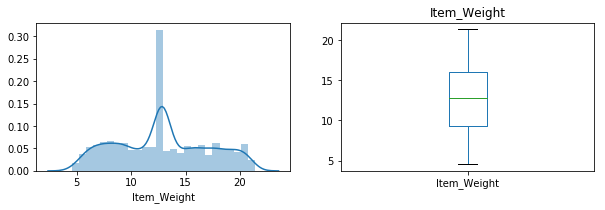

In [23]:
plt.figure(1)
plt.subplot(221)
sns.distplot(df['Item_Weight'])
plt.subplot(222)
df['Item_Weight'].plot.box(figsize=(10,6), title='Item_Weight')

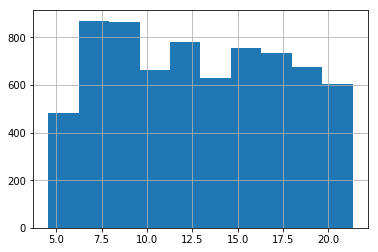

In [24]:
train['Item_Weight'].hist()

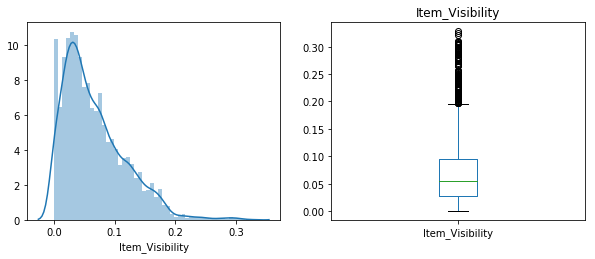

In [25]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Item_Visibility'])
plt.subplot(222)
train['Item_Visibility'].plot.box(figsize=(10,8), title='Item_Visibility')

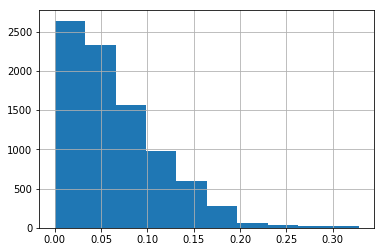

In [26]:
train['Item_Visibility'].hist()

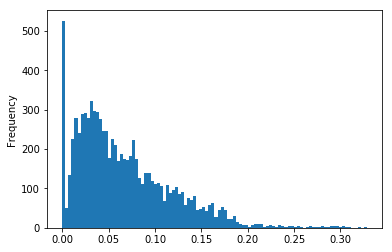

In [27]:
train['Item_Visibility'].plot(kind='hist', bins=100)


#iteam visiblity should not be zero, this is wrong, we will change this later and replace wiht its mean value

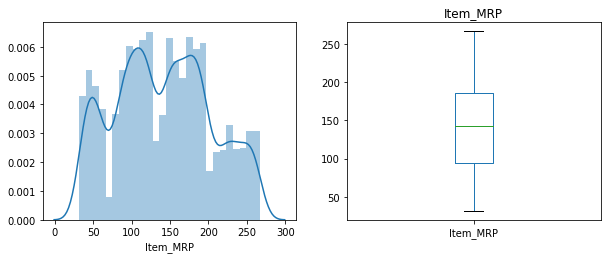

In [28]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Item_MRP'])
plt.subplot(222)
train['Item_MRP'].plot.box(figsize=(10,8), title='Item_MRP')

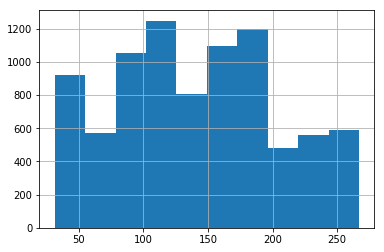

In [29]:
train['Item_MRP'].hist()

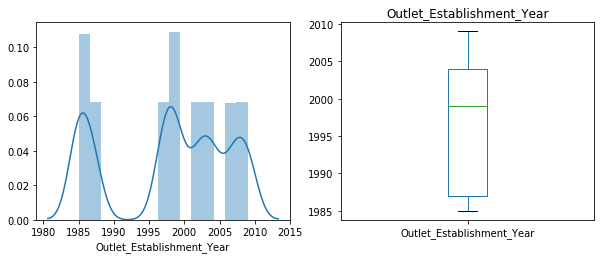

In [30]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Outlet_Establishment_Year'])
plt.subplot(222)
train['Outlet_Establishment_Year'].plot.box(figsize=(10,8), title='Outlet_Establishment_Year')

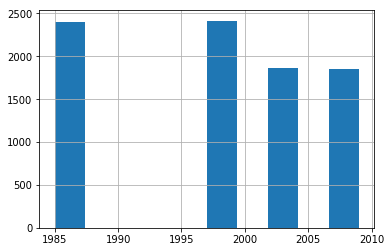

In [31]:
train['Outlet_Establishment_Year'].hist()

In [32]:
#Categorical data

In [33]:
#train['Item_Identifier'].value_counts(normalize=True).plot.bar(title='Item_Identifier')

#output doesnt come properly

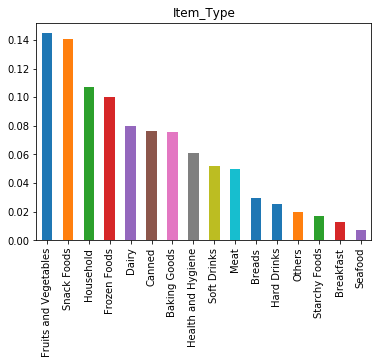

In [34]:
train['Item_Type'].value_counts(normalize=True).plot.bar(title='Item_Type')

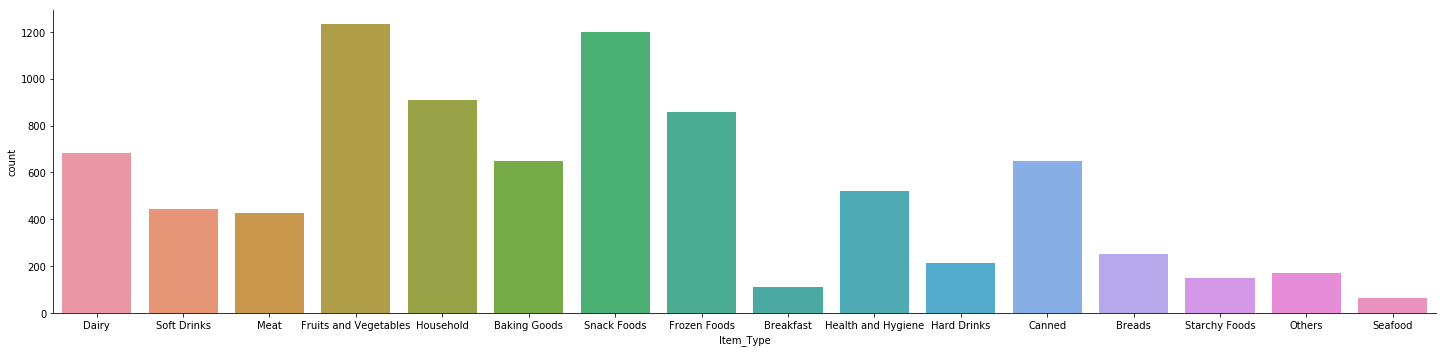

In [35]:
sns.catplot(x='Item_Type', kind='count', data=train, aspect=4)

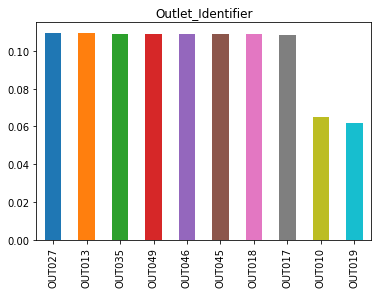

In [36]:
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(title='Outlet_Identifier')


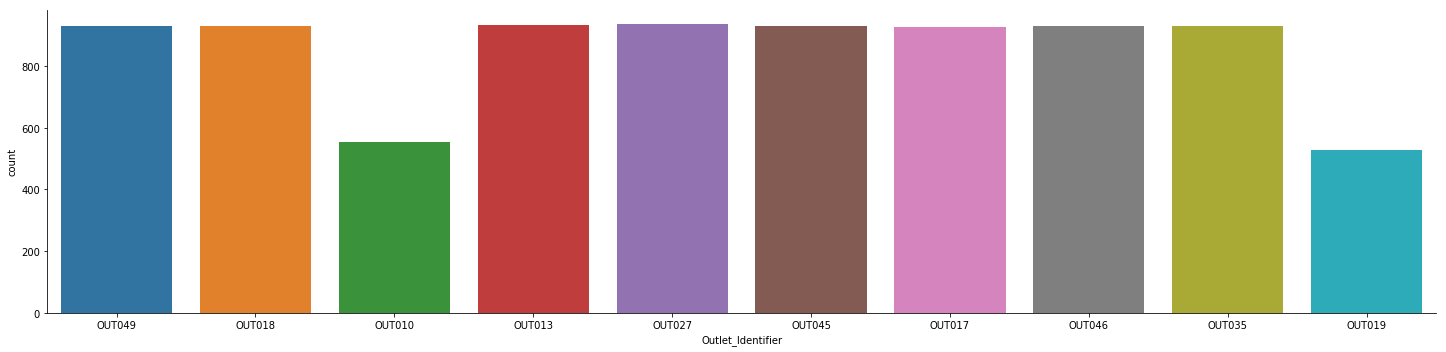

In [37]:
sns.catplot(x='Outlet_Identifier', kind='count', data=train, aspect=4)

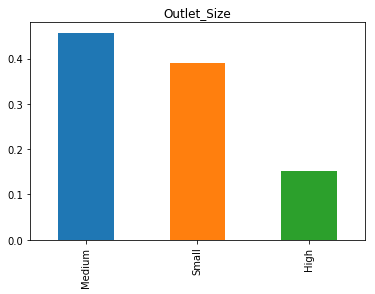

In [38]:
train['Outlet_Size'].value_counts(normalize=True).plot.bar(title='Outlet_Size')


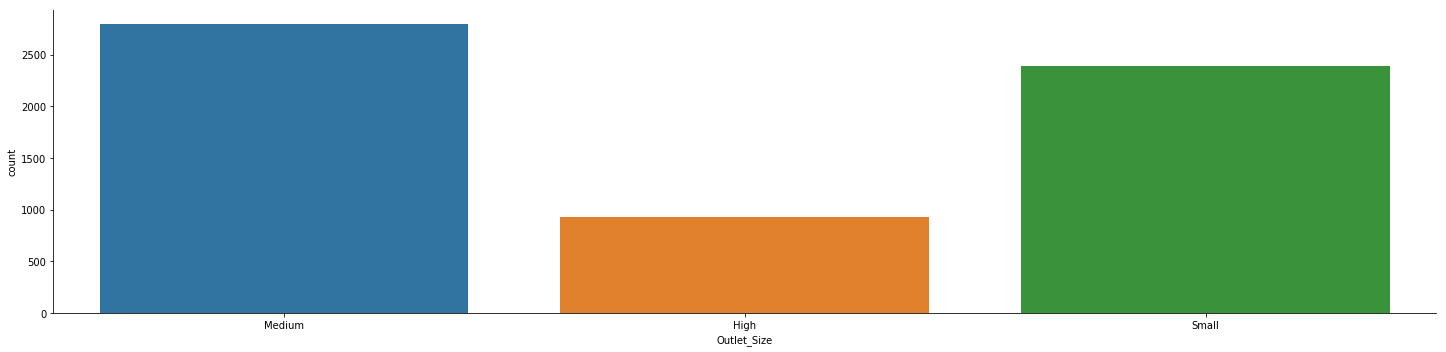

In [39]:
sns.catplot(x='Outlet_Size', kind='count', data=train, aspect=4)

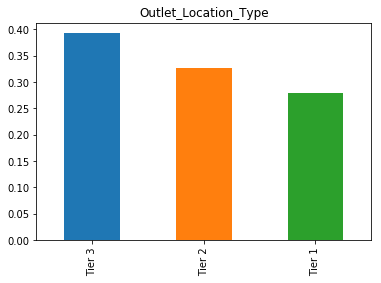

In [40]:
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(title='Outlet_Location_Type')


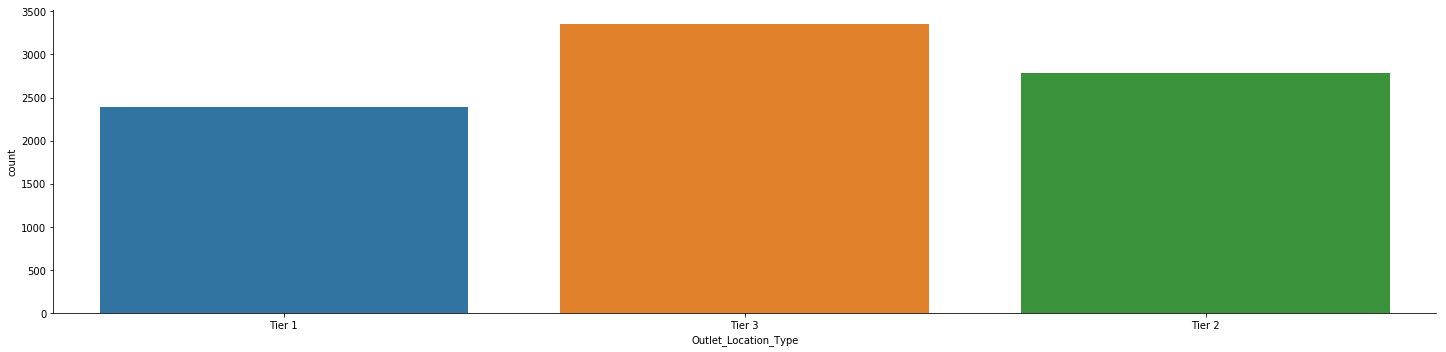

In [41]:
sns.catplot(x='Outlet_Location_Type', kind='count', data=train, aspect=4)

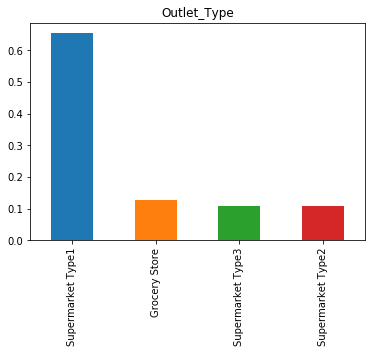

In [42]:
train['Outlet_Type'].value_counts(normalize=True).plot.bar(title='Outlet_Type')

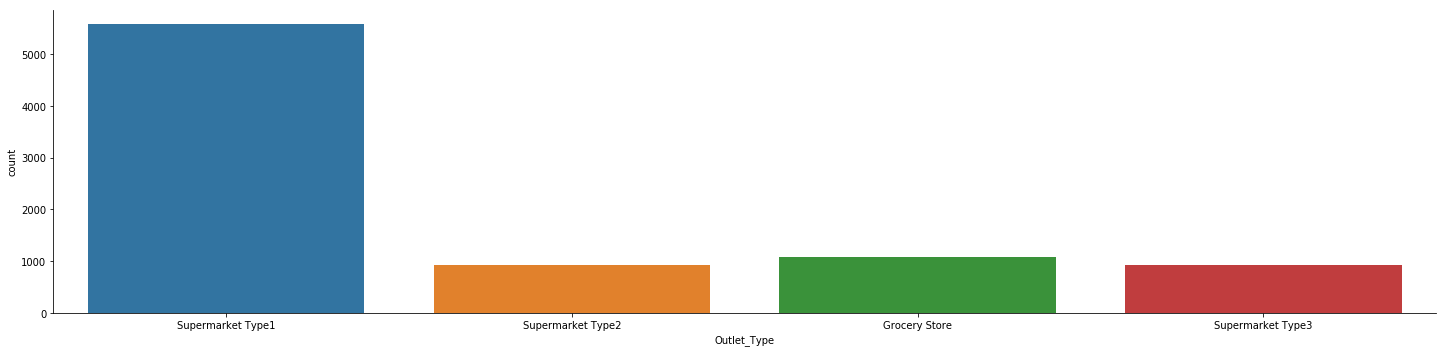

In [43]:
sns.catplot(x='Outlet_Type', kind='count', data=train, aspect=4)

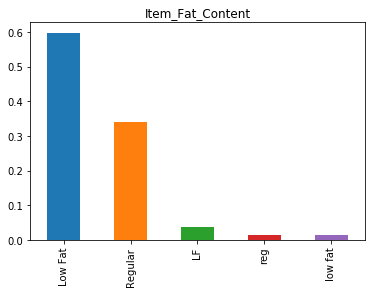

In [44]:
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title='Item_Fat_Content')


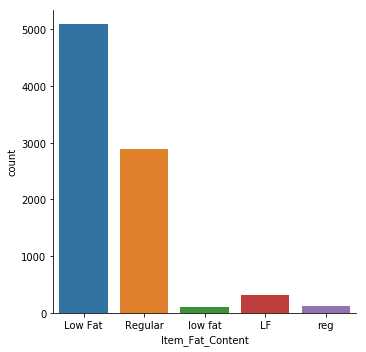

In [45]:
sns.catplot(x='Item_Fat_Content', kind='count', data=train)

In [46]:
#Replacing LF and RF

In [47]:
train['Item_Fat_Content'].replace({'reg':'Regular', 'Low Fat':'Low fats', 'low fat':'Low fats', 'LF':'Low fats'}, inplace=True)

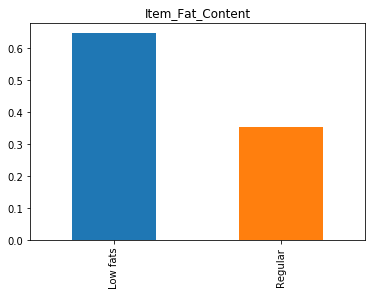

In [48]:
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title='Item_Fat_Content')

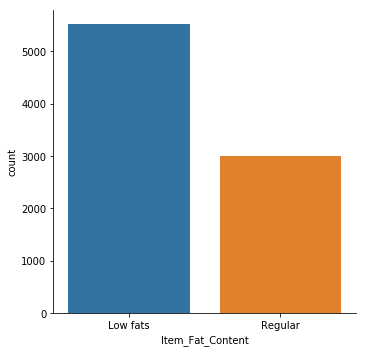

In [49]:
sns.catplot(x='Item_Fat_Content', kind='count', data=train)

In [50]:
#Bi-Variate analysis
#Numerical TV vs Numerical IV

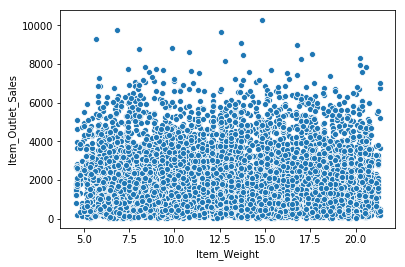

In [51]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train)

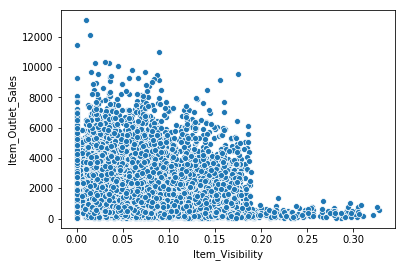

In [52]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train)

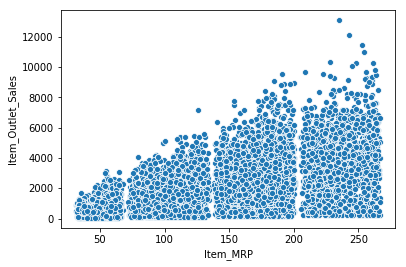

In [53]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train)

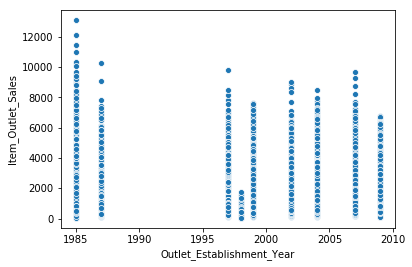

In [54]:
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)

In [55]:
#Numerical DV vs Categorical Variables

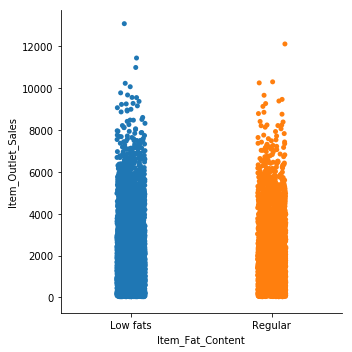

In [56]:
sns.catplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=train)

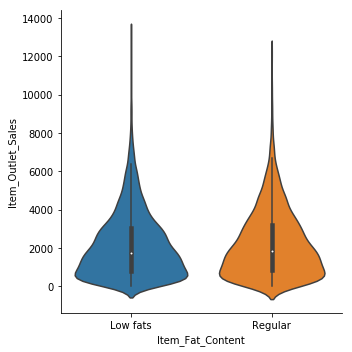

In [57]:
sns.catplot(x='Item_Fat_Content', y='Item_Outlet_Sales', kind='violin',data=train)

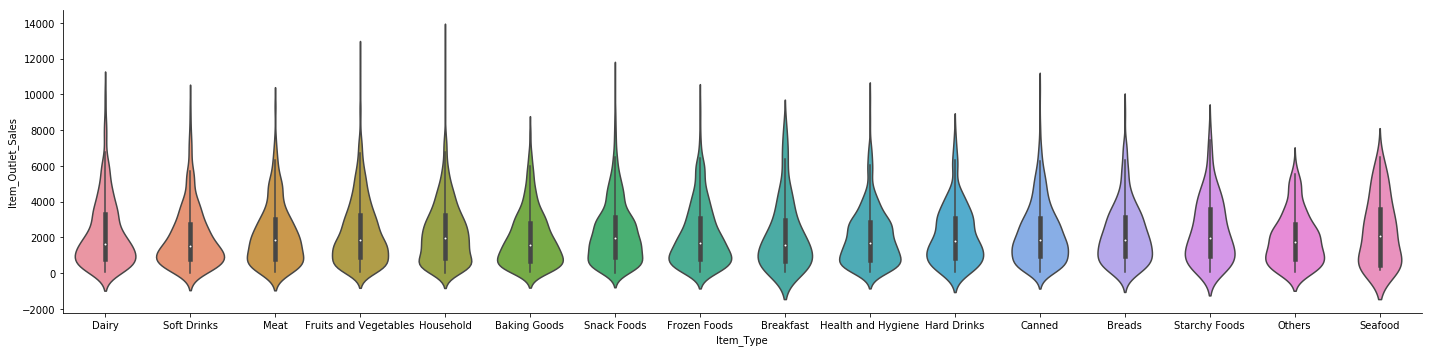

In [58]:
sns.catplot(x='Item_Type', y='Item_Outlet_Sales',kind='violin', data=train,aspect=4)

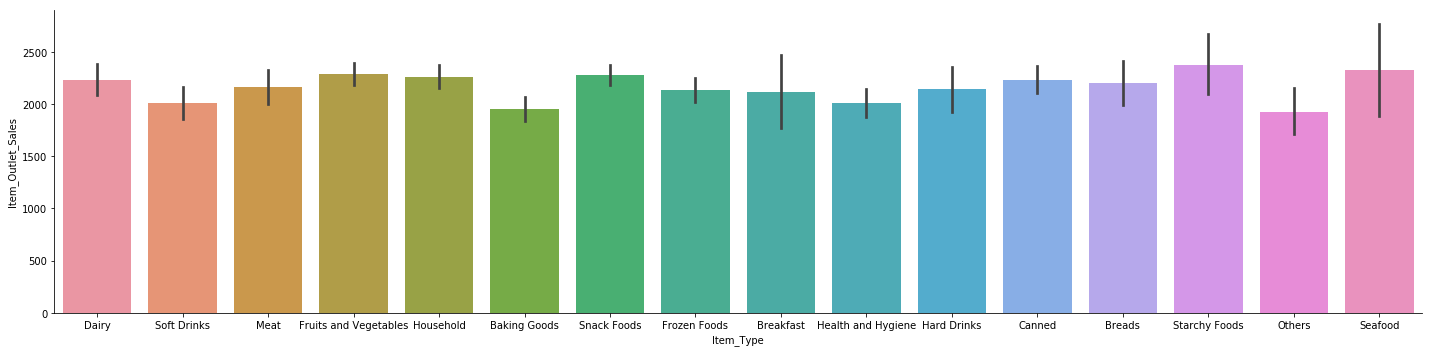

In [59]:
sns.catplot(x='Item_Type', y='Item_Outlet_Sales',kind='bar', data=train,aspect=4)

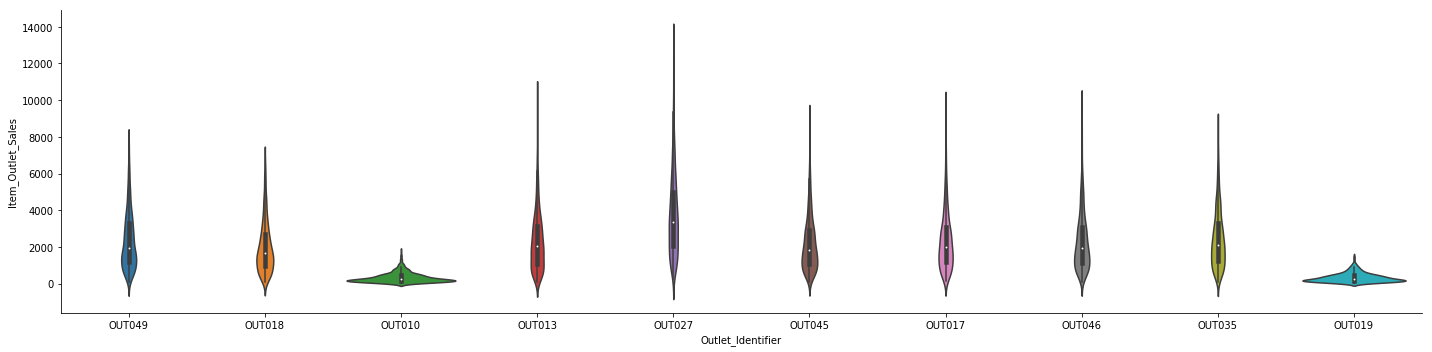

In [60]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind='violin', data=train,aspect=4)

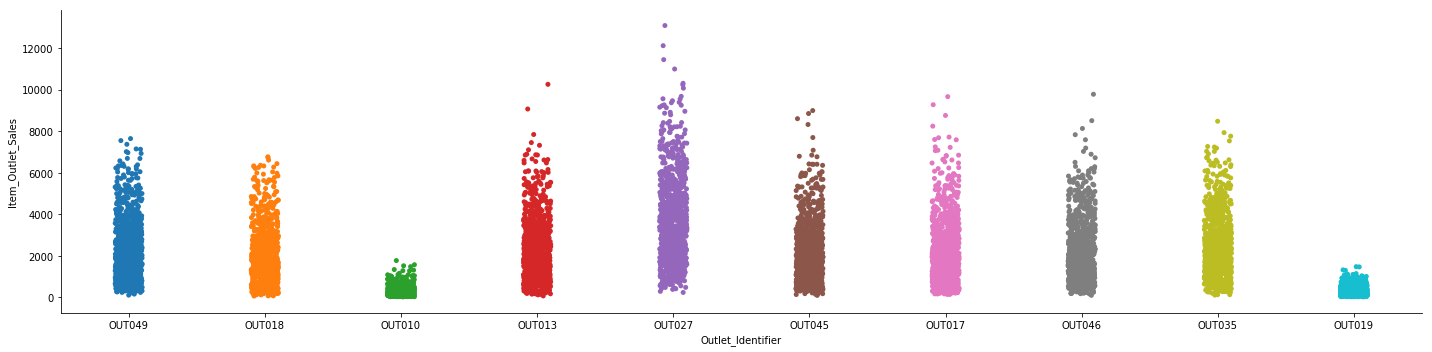

In [61]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train,aspect=4)

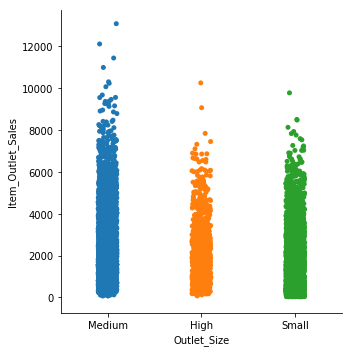

In [62]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)

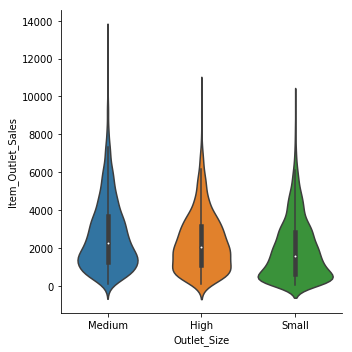

In [63]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales',kind='violin' ,data=train)

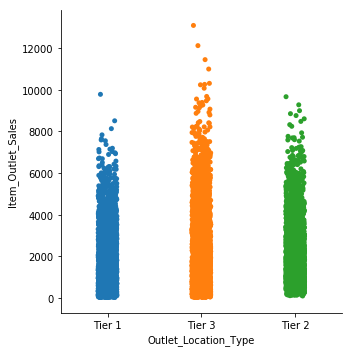

In [64]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data=train)

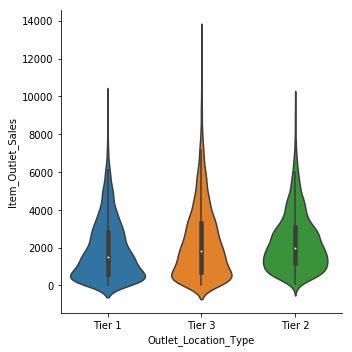

In [65]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', kind='violin', data=train)

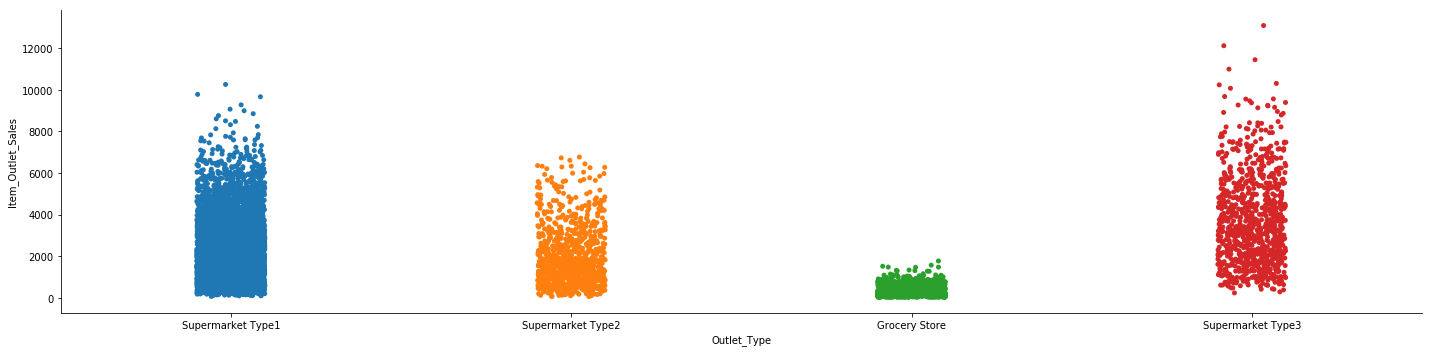

In [66]:
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, aspect=4)

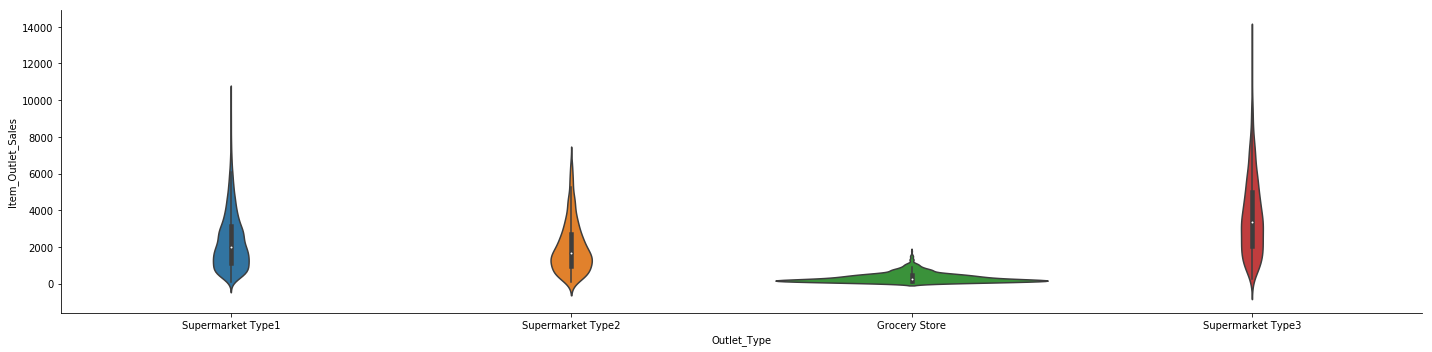

In [67]:
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', kind='violin',data=train, aspect=4)

In [68]:
#Before proceeding with the model building, we will do feature engineering
#But, before that, we must treat Null values

In [69]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [71]:
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [72]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [73]:
train.Item_Weight.isna().sum()

0

In [74]:
train['Outlet_Size'].fillna('Medium',inplace  = True)

In [75]:
train['Outlet_Size'].isna().sum()

0

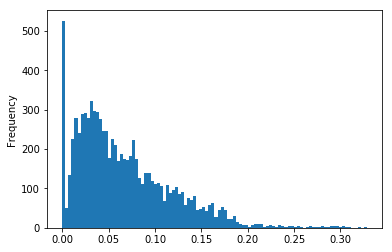

In [76]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [77]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [78]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

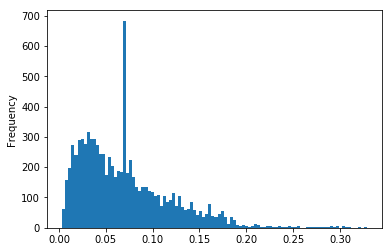

In [79]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [80]:
#Feature Engineering

In [81]:
#creating new features 

In [82]:
#train['Item_Type'].nunique()
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [83]:
#creating a new feature called item_type_new()

In [84]:
perishable=['Breads', 'Breakfast', 'Dairy', 'Fruits and Vegetables', 'Meat','Seafood']
nonperishable=['Baking Goods', 'Canned', 'Frozen Foods', 'Hard Drinks', 'Health and Hygiene','Household', 'Soft Drinks' ]
item_list=[]
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif(i in nonperishable):
        item_list.append('nonperishable')
    else:
        item_list.append('Not sure')
        
train['Item_Type_new']= item_list

In [85]:
train['Item_Type_new'].head(10)

0       perishable
1    nonperishable
2       perishable
3       perishable
4    nonperishable
5    nonperishable
6         Not sure
7         Not sure
8    nonperishable
9    nonperishable
Name: Item_Type_new, dtype: object

In [86]:
# with the Item_Identifier variable we can create a new feature
train['Item_Category']=  train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR', '^FD[A-Z]*[0-9]*':'FD', '^NC[A-Z]*[0-9]*':'NC'}, regex=True)

In [87]:
train['Item_Category'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Category, dtype: object

In [88]:
Food = pd.crosstab(train['Item_Type'], train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


In [89]:
#We will 
#also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have
#any fat content

train['Item_Fat_Content'][(train['Item_Category']=='NC')]= 'Non Edible'

In [90]:
train['Item_Fat_Content'].unique()

array(['Low fats', 'Regular', 'Non Edible'], dtype=object)

In [91]:
#creating a varibale with Outlet_Establishment_Year

In [92]:
train['Outlet_Years']= 2020-train['Outlet_Establishment_Year']
train['Outlet_Years'].head()

0    21
1    11
2    21
3    22
4    33
Name: Outlet_Years, dtype: int64

In [93]:
#creating another variable which says, the price per unit weight

In [94]:
train['price_per_unit_wt']= train['Item_MRP']/train['Item_Weight']
train['price_per_unit_wt'].head()

0    26.861204
1     8.153581
2     8.092457
3     9.484115
4     6.031512
Name: price_per_unit_wt, dtype: float64

In [95]:
#Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. 
#Now let’s assign a label to each of these chunks and use this label as a new variable.


#function def
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'

train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,price_per_unit_wt,Item_MRP_Clusters
0,FDA15,9.300000,Low fats,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,21,26.861204,4th
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,nonperishable,DR,11,8.153581,1st
2,FDN15,17.500000,Low fats,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,21,8.092457,3rd
3,FDX07,19.200000,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,perishable,FD,22,9.484115,3rd
4,NCD19,8.930000,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,nonperishable,NC,33,6.031512,1st
5,FDP36,10.395000,Regular,0.070482,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,nonperishable,FD,11,4.944762,1st
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,Not sure,FD,33,4.224088,1st
7,FDP10,779.714889,Low fats,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,Not sure,FD,35,0.138207,2nd
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,nonperishable,FD,18,5.985963,2nd
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,nonperishable,FD,13,9.782365,3rd


In [96]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

In [97]:
#Label Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])

In [99]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int32
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int32
Outlet_Location_Type         8523 non-null int32
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       8523 non-null object
Item_Type_new                8523 non-null object
Item_Category                8523 non-null object
Outlet_Years                 8523 non-null int64
price_per_unit_wt            8523 non-null float64
Item_MRP_Clusters            8523 non-null 

In [101]:
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category', 'source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [102]:
#Removing skewness
train['price_per_unit_wt'] = np.log(train['price_per_unit_wt'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

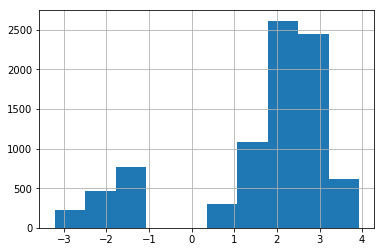

In [103]:
train['price_per_unit_wt'].hist()

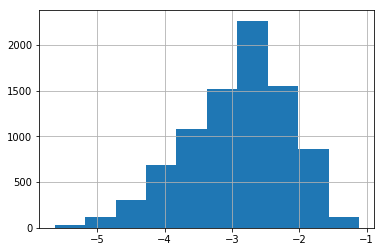

In [104]:
train['Item_Visibility'].hist()

In [105]:
corr = train.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,price_per_unit_wt,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Not sure,Item_Type_new_nonperishable,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
Item_Weight,1.000000,-0.003317,0.066080,-0.008383,-0.697827,0.144015,0.092652,0.080829,0.697827,-0.931502,...,0.319613,-0.626303,-0.159086,0.771038,0.001699,-0.016239,0.015956,-0.014775,0.010002,-0.000490
Item_Fat_Content,-0.003317,1.000000,0.022764,0.008594,0.001451,-0.001791,0.000958,0.015249,-0.001451,0.007066,...,0.000742,-0.001443,0.001810,-0.000399,-0.012913,-0.039354,0.052585,-0.257054,0.116740,0.057458
Item_Visibility,0.066080,0.022764,1.000000,-0.001259,-0.051790,0.053380,-0.018024,-0.097821,0.051790,-0.061003,...,0.220199,-0.113338,-0.021623,-0.040640,-0.003787,-0.042096,0.048058,-0.000217,0.071544,-0.082243
Item_MRP,-0.008383,0.008594,-0.001259,1.000000,0.005020,0.006059,0.000232,0.567574,-0.005020,0.301232,...,-0.004277,0.004885,0.003850,-0.006714,0.028963,-0.056826,0.037030,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-0.697827,0.001451,-0.051790,0.005020,1.000000,0.193389,-0.089216,-0.049135,-1.000000,0.649372,...,-0.281196,0.245070,0.466336,-0.538072,0.005425,0.011359,-0.016566,0.009441,-0.002312,-0.004385
Outlet_Size,0.144015,-0.001791,0.053380,0.006059,0.193389,1.000000,-0.614311,-0.086182,-0.193389,-0.129581,...,0.201288,-0.010163,-0.099476,-0.099896,0.004521,0.001302,-0.005085,-0.002343,0.003762,-0.002583
Outlet_Location_Type,0.092652,0.000958,-0.018024,0.000232,-0.089216,-0.614311,1.000000,0.089367,0.089216,-0.087003,...,-0.041284,-0.472793,0.381559,0.383172,-0.004614,0.001213,0.002475,-0.005539,-0.001713,0.006109
Item_Outlet_Sales,0.080829,0.015249,-0.097821,0.567574,-0.049135,-0.086182,0.089367,1.000000,0.049135,0.092287,...,-0.411727,0.108765,-0.038059,0.311192,0.018100,-0.036612,0.024315,-0.034672,0.031905,-0.010861
Outlet_Years,0.697827,-0.001451,0.051790,-0.005020,-1.000000,-0.193389,0.089216,0.049135,1.000000,-0.649372,...,0.281196,-0.245070,-0.466336,0.538072,-0.005425,-0.011359,0.016566,-0.009441,0.002312,0.004385
price_per_unit_wt,-0.931502,0.007066,-0.061003,0.301232,0.649372,-0.129581,-0.087003,0.092287,-0.649372,1.000000,...,-0.297934,0.582237,0.148257,-0.716291,0.003193,0.004903,-0.007846,0.004486,0.002912,-0.006704


In [106]:
#sns.heatmap(corr,square=True, annot=True,cmap='BuPu') , dont run this

In [107]:
#Model Building

In [108]:
#Linear regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
X=train.drop('Item_Outlet_Sales', axis=1)
y=train['Item_Outlet_Sales']

In [111]:
#Train test split

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_valid,y_train, y_valid= train_test_split(X,y,random_state=0)

In [114]:
print(X_train.shape, X_valid.shape,y_train.shape, y_valid.shape)

(6392, 1605) (2131, 1605) (6392,) (2131,)


In [115]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,price_per_unit_wt,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_Not sure,Item_Type_new_nonperishable,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
3865,10.695,2,-2.287283,173.7712,1998,1,2,22,2.787963,2,...,1,0,0,0,0,0,1,0,1,0
6191,8.880,1,-2.312392,208.5270,2009,1,2,11,3.156267,3,...,0,0,1,0,0,1,0,0,0,1
5584,5.260,2,-3.173966,161.8868,1999,1,0,21,3.426766,2,...,0,1,0,0,0,1,0,0,1,0
5388,18.250,0,-2.652400,224.1062,2009,1,2,11,2.507955,3,...,0,0,1,0,0,1,0,0,1,0
1484,16.750,1,-3.424040,192.1162,2004,2,1,16,2.439702,2,...,0,1,0,0,0,1,0,0,0,1


In [116]:
model=LinearRegression(normalize=True, fit_intercept=True)

In [117]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [118]:
y_pred= model.predict(X_valid)

In [119]:
model.score(X_train, y_train)

0.6355411966192133

In [120]:
model.score(X_valid, y_valid)

0.6297978497407594

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
mean_squared_error(y_valid, y_pred)

1109168.2400633183

In [123]:
mean_absolute_error(y_valid, y_pred)

796.8002932895355

In [124]:
#XGBOOST REGRESSOR
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

Mean Absolute Error : 823.2254598314032


In [125]:
#Lasso Regressor
from sklearn.linear_model import Lasso

ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)


predictions = ls.predict(X_valid)

mean_absolute_error(y_valid,predictions)

994.1724961999498